# Segmentation et Clustering

In [307]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
df = pd.read_csv("./data/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Analyse univarié

In [309]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


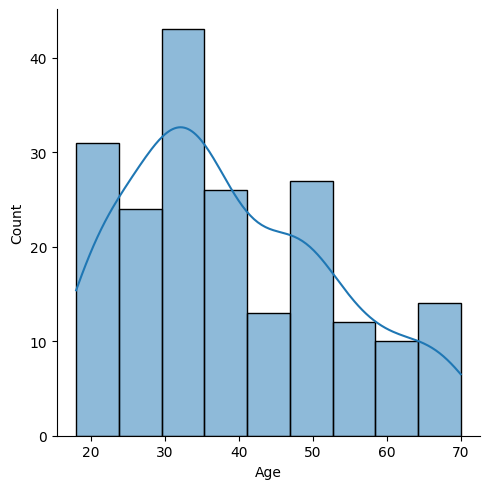

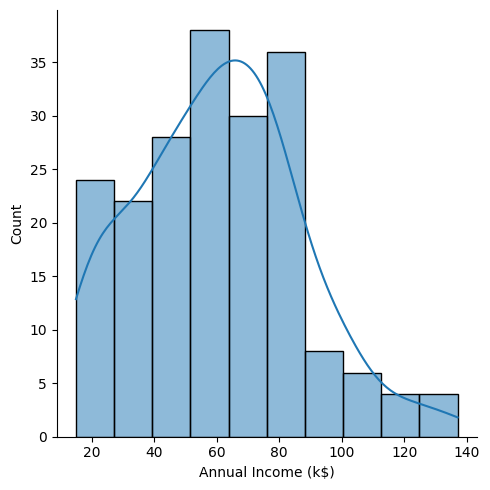

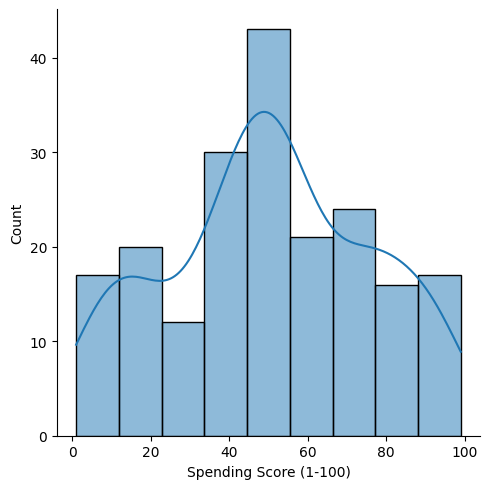

In [311]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

for col in columns:
    sns.displot(df[col], kde = True)
    plt.show()

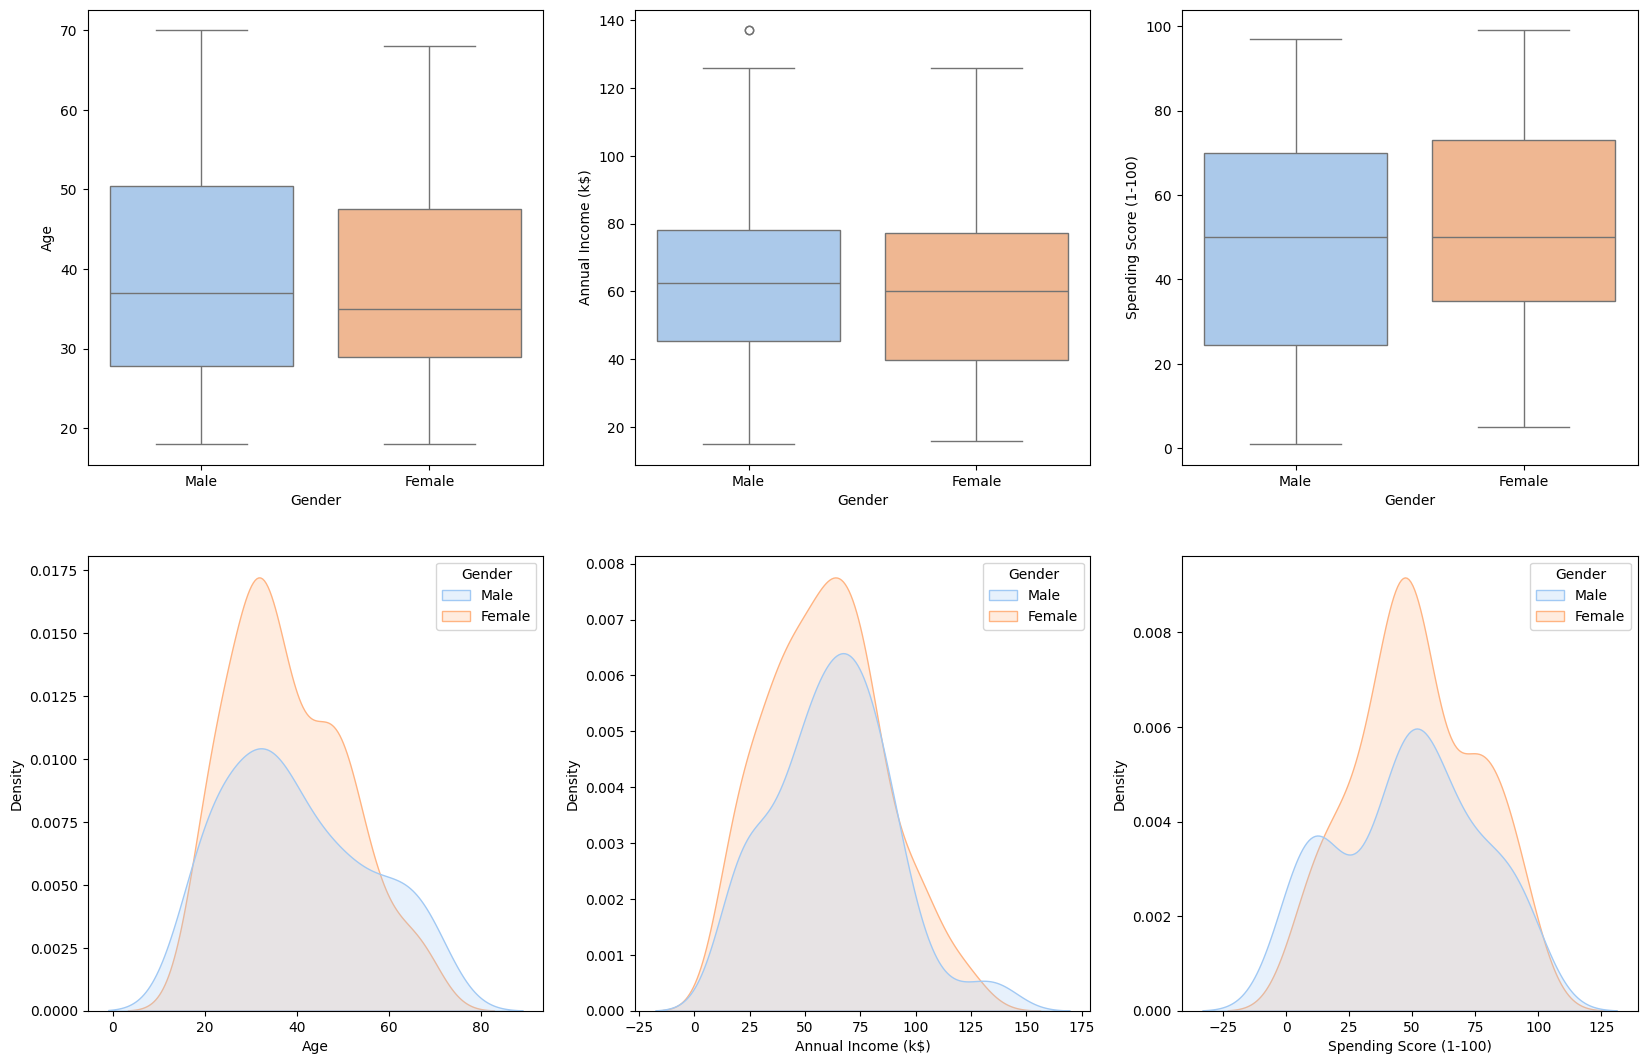

In [312]:
fig, axs = plt.subplots(2,3, figsize = (20,13))

sns.boxplot(data=df, x="Gender", y= df["Age"], hue=df.Gender, palette="pastel", ax=axs[0][0])
sns.boxplot(data=df, x="Gender", y= df["Annual Income (k$)"], hue=df.Gender, palette="pastel", ax=axs[0][1])
sns.boxplot(data=df, x="Gender", y= df["Spending Score (1-100)"], hue=df.Gender, palette="pastel", ax=axs[0][2])

sns.kdeplot(data=df, x=df["Age"],palette="pastel", hue=df["Gender"], fill=True, ax=axs[1][0])
sns.kdeplot(data=df, x=df["Annual Income (k$)"],palette="pastel", hue=df["Gender"], fill=True, ax=axs[1][1])
sns.kdeplot(data=df, x=df["Spending Score (1-100)"],palette="pastel", hue=df["Gender"], fill=True, ax=axs[1][2])

plt.show()

In [313]:
df.Gender.value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Analyse bivariée

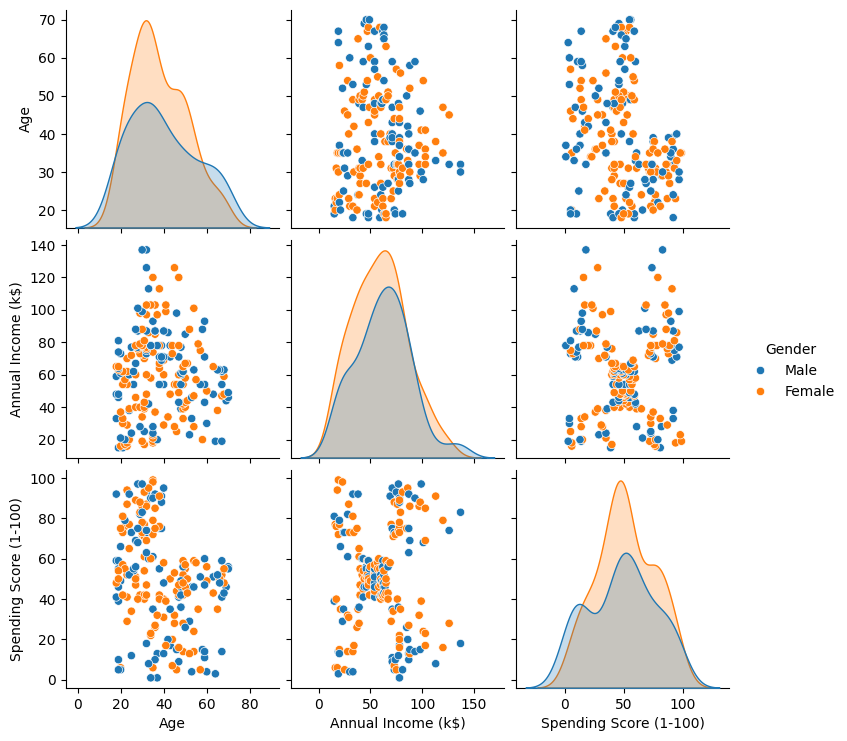

In [314]:
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender")

In [315]:
df.groupby("Gender")[["Age","Annual Income (k$)", "Spending Score (1-100)"]]. mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

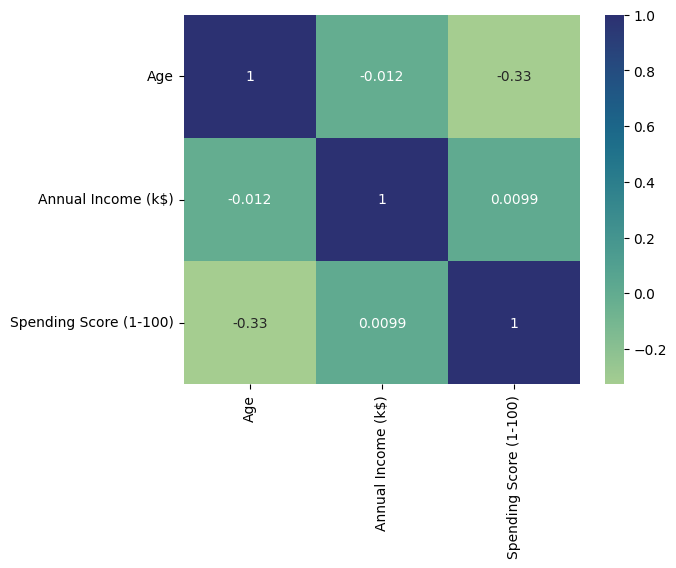

In [316]:
sns.heatmap(df.drop(["CustomerID","Gender"], axis=1).corr(), annot=True, cmap="crest")

## Clustering - univarié, bivarié et multivarié

In [317]:
from sklearn.cluster import KMeans

In [318]:
#Univarié
Cluster_uni = KMeans(n_clusters=4)

Cluster_uni.fit(df[["Annual Income (k$)"]])
df["Income Cluster"] = Cluster_uni.labels_

df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
182,183,Male,46,98,15,3
39,40,Female,20,37,75,1
184,185,Female,41,99,39,3
169,170,Male,32,87,63,3
194,195,Female,47,120,16,2


In [319]:
df["Income Cluster"].value_counts()

Income Cluster
0    76
3    60
1    56
2     8
Name: count, dtype: int64

In [320]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia.append(kmeans.inertia_)

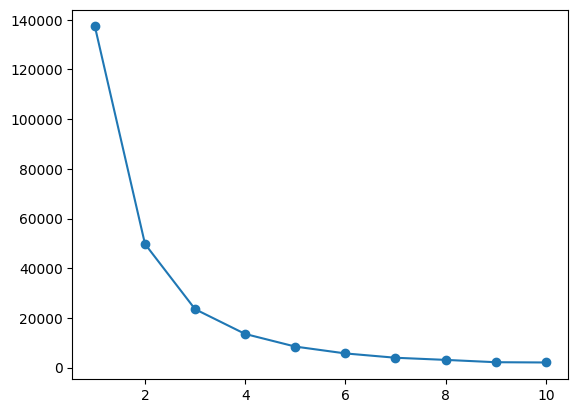

In [321]:
plt.plot(range(1,11), inertia, marker = "o")
plt.show()

In [322]:
df.groupby("Income Cluster")[["Age","Annual Income (k$)", 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,43.236842,58.421053,50.526316
1,36.303571,29.035714,49.750000
2,36.500000,124.000000,49.625000
3,35.983333,84.233333,50.283333


In [323]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [324]:
#Bivarié
Cluster_bi = KMeans(n_clusters=5)
Cluster_bi.fit(df[["Annual Income (k$)",'Spending Score (1-100)']])
df["Spending Score et Income cluster"] = Cluster_bi.labels_

df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score et Income cluster
140,141,Female,57,75,5,3,3
39,40,Female,20,37,75,1,2
107,108,Male,54,63,46,0,1
73,74,Female,60,50,56,0,1
8,9,Male,64,19,3,1,4


In [325]:
df["Spending Score et Income cluster"].value_counts()

Spending Score et Income cluster
1    81
0    39
3    35
4    23
2    22
Name: count, dtype: int64

In [326]:
inertia2 = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia2.append(kmeans.inertia_)

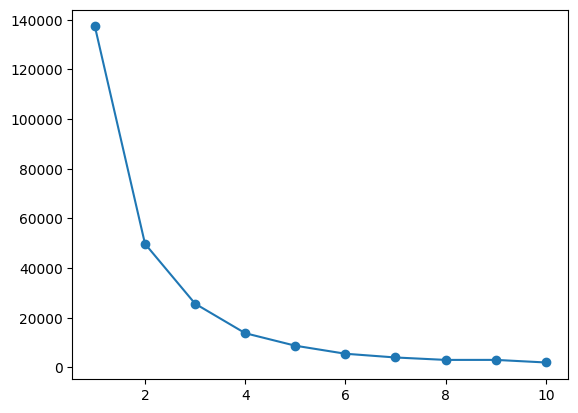

In [327]:
plt.plot(range(1,11), inertia2, marker = "o")
plt.show()

In [328]:
df.groupby("Spending Score et Income cluster")[["Age","Annual Income (k$)", 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending Score et Income cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [329]:
center = pd.DataFrame(Cluster_bi.cluster_centers_)
center.columns = ["X","Y"]

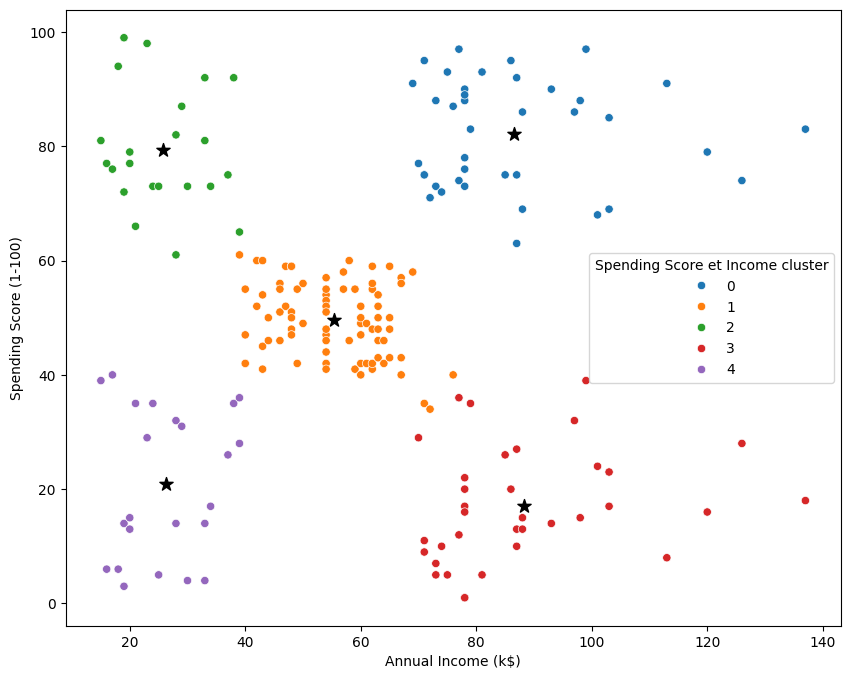

In [330]:
plt.figure(figsize=(10,8))
plt.scatter(x=center["X"], y=center["Y"], marker="*", s= 100, c="black")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue = "Spending Score et Income cluster", palette = "tab10")
plt.show()

In [331]:
from sklearn.preprocessing import StandardScaler

In [332]:
scale = StandardScaler()

In [333]:
dff = pd.get_dummies(df, dtype="int", drop_first=True)
dff.sample(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score et Income cluster,Gender_Male
73,74,60,50,56,0,1,0
143,144,32,76,87,3,0,0
90,91,68,59,55,0,1,0
51,52,33,42,60,1,1,1
172,173,36,87,10,3,3,1


In [334]:
dff.drop(['CustomerID','Income Cluster', 'Spending Score et Income cluster'], inplace=True, axis=1)

In [335]:
dff.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
107,54,63,46,1
186,54,101,24,0
193,38,113,91,0
94,32,60,42,0
6,35,18,6,0
124,23,70,29,0
149,34,78,90,1
44,49,39,28,0
35,21,33,81,0
58,27,46,51,0


In [336]:
dff = scale.fit_transform(dff)

In [337]:
inertia3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia3.append(kmeans3.labels_)

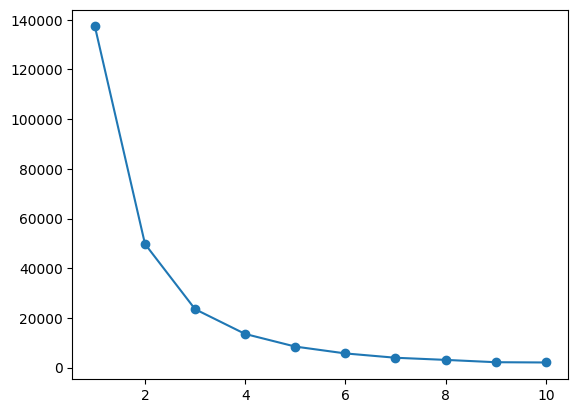

In [338]:
plt.plot(range(1,11), inertia, marker = "o")
plt.show()